In [93]:
import pandas as pd
from sklearn.cross_validation import train_test_split

In [125]:
df, df_check = train_test_split(pd.read_csv("./data/train.csv",index_col=0,header=0),test_size=0.2)

In [ ]:
df.loc[:,'v62'].dtype == 'int'

In [ ]:
data_type = df['v1'].values.dtype


In [ ]:
data_type == 'float'

In [ ]:
s = set(df['v3'].values)
s

In [ ]:
inspect = df.loc[:,'v3'] 


In [126]:
all_types = []
float_cols = []
int_cols = []
other_cols = []
for c in df.columns:
    typ = df[c].dtype
    all_types.append(typ)
    if typ == 'float64':
        float_cols.append(c)
    elif  typ == 'int64':
        int_cols.append(c)
    else:
        other_cols.append(c)
other_cols
#set(all_types)

['v3',
 'v22',
 'v24',
 'v30',
 'v31',
 'v47',
 'v52',
 'v56',
 'v66',
 'v71',
 'v74',
 'v75',
 'v79',
 'v91',
 'v107',
 'v110',
 'v112',
 'v113',
 'v125']

In [127]:
n_cats = {}
for c in other_cols:
    n_cats[c] = len(set(df[c].values))
n_cats

{'v107': 8,
 'v110': 3,
 'v112': 23,
 'v113': 36,
 'v125': 91,
 'v22': 16599,
 'v24': 5,
 'v3': 4,
 'v30': 8,
 'v31': 4,
 'v47': 9,
 'v52': 13,
 'v56': 118,
 'v66': 3,
 'v71': 8,
 'v74': 3,
 'v75': 4,
 'v79': 18,
 'v91': 8}

In [128]:
df.drop('v22',axis='columns',inplace=True)
df_check.drop('v22',axis='columns',inplace=True)
other_cols.remove('v22')
#df.loc[:,slice('v21','v23')]
cat_cols = df[other_cols]
cat_cols_check = df_check[other_cols]
df.drop(other_cols,axis='columns',inplace=True)
df_check.drop(other_cols,axis='columns',inplace=True)
cat_cols = pd.get_dummies(cat_cols,dummy_na=True)
cat_cols_check = pd.get_dummies(cat_cols_check,dummy_na=True)

In [129]:
df = df.merge(cat_cols,how='inner',left_index=True,right_index=True) 
df_check = df_check.merge(cat_cols_check,how='inner',left_index=True,right_index=True) 

In [130]:
x_train = df.iloc[1:]
x_check = df_check.iloc[1:]
for c in x_train.columns:
    x_train.loc[:,c] = x_train.loc[:,c].fillna(x_train.loc[:,c].mean())
    x_check.loc[:,c] = x_check.loc[:,c].fillna(x_check.loc[:,c].mean())
y_train = df.loc[:,'target']
y_check = df_check.loc[:,'target']

C:\cygwin\home\Mattia\Anaconda3\lib\site-packages\pandas\core\indexing.py:461: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


KeyError: 'the label [v56_AB] is not in the [columns]'

In [ ]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 

In [ ]:
RandForClass = RandomForestClassifier(n_estimators=100)

In [ ]:
LogClass = LogisticRegression(C=0.00001)

In [83]:
import random as rnd

In [43]:
corr_mat = x_train.corr()
corr_mat

,v1,v2,v4,v5,v6,v7,v8,v9,v10,v11,...,v125_R,v125_S,v125_T,v125_U,v125_V,v125_W,v125_X,v125_Y,v125_Z,v125_nan
v1,1.000000,-0.213590,-0.141528,-0.066244,-0.015818,0.099846,0.151984,-0.021210,-0.015303,-0.267546,...,-0.010204,-0.015668,-0.012000,0.008665,-0.015610,0.012820,0.001624,-0.003494,-0.013241,0.000098
v2,-0.213590,1.000000,0.537830,0.200982,0.021967,0.350298,-0.357556,-0.008771,0.038494,0.218961,...,0.014902,0.007256,0.072387,-0.050640,0.002279,0.026910,-0.037570,0.008075,0.135169,-0.000873
v4,-0.141528,0.537830,1.000000,0.263969,0.374784,0.474903,-0.161703,-0.210501,0.063204,0.118188,...,0.015673,0.010383,0.022533,0.031411,-0.028100,0.006154,0.021100,0.009151,-0.029055,0.000265
v5,-0.066244,0.200982,0.263969,1.000000,0.240272,0.052639,0.001296,-0.172439,0.036364,0.115817,...,-0.024329,0.018049,-0.014471,0.009978,0.037376,0.000430,-0.006148,-0.006568,0.005188,0.001036
v6,-0.015818,0.021967,0.374784,0.240272,1.000000,0.193329,0.022813,-0.055478,0.031943,0.067660,...,-0.017435,-0.006824,0.006070,0.056602,-0.028100,-0.001776,0.028411,-0.011710,-0.037996,-0.001458
v7,0.099846,0.350298,0.474903,0.052639,0.193329,1.000000,-0.223538,-0.053663,0.011202,-0.213558,...,0.038901,0.008747,0.024749,0.015022,-0.063716,0.002571,0.037529,0.003193,-0.007810,-0.001383
v8,0.151984,-0.357556,-0.161703,0.001296,0.022813,-0.223538,1.000000,-0.170961,-0.004535,-0.181485,...,-0.028774,-0.003645,-0.022366,-0.001623,0.016913,-0.016649,-0.027673,-0.022376,-0.024399,0.002271
v9,-0.021210,-0.008771,-0.210501,-0.172439,-0.055478,-0.053663,-0.170961,1.000000,-0.019481,-0.190986,...,0.041361,-0.000791,0.021171,-0.023354,-0.022409,0.002975,0.009418,0.029143,0.017511,-0.000975
v10,-0.015303,0.038494,0.063204,0.036364,0.031943,0.011202,-0.004535,-0.019481,1.000000,0.028556,...,-0.002339,-0.000276,0.002695,0.001315,-0.008125,-0.000044,0.007429,-0.000565,-0.009478,0.011933
v11,-0.267546,0.218961,0.118188,0.115817,0.067660,-0.213558,-0.181485,-0.190986,0.028556,1.000000,...,-0.008105,-0.005257,0.004726,0.005417,-0.026235,0.001540,0.023003,-0.008672,0.013380,-0.002806


In [44]:
from sklearn.decomposition import PCA

In [55]:
princ_comp = PCA(n_components=len(x_train.columns)//70)
x_train_transform = princ_comp.fit_transform(x_train)

In [58]:
#lm = LogClass.fit(x_train_transform,y_train)
rf = RandForClass.fit(x_train_transform,y_train)

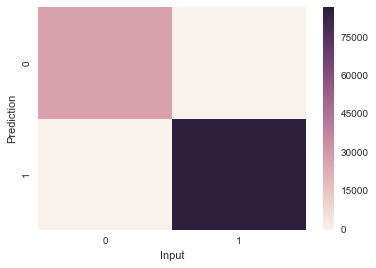

In [59]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
#ax = sns.heatmap(confusion_matrix(lm.predict(x_train_transform),y_train))
ax = sns.heatmap(confusion_matrix(rf.predict(x_train_transform),y_train))
ax.set_xlabel('Input')
ax.set_ylabel('Prediction')

In [79]:
df_test = pd.read_csv("./data/test.csv",index_col=0)
#df_test

In [80]:
all_types = []
float_cols = []
int_cols = []
other_cols = []
for c in df_test.columns:
    typ = df_test[c].dtype
    all_types.append(typ)
    if typ == 'float64':
        float_cols.append(c)
    elif  typ == 'int64':
        int_cols.append(c)
    else:
        other_cols.append(c)
other_cols

['v3',
 'v22',
 'v24',
 'v30',
 'v31',
 'v47',
 'v52',
 'v56',
 'v66',
 'v71',
 'v74',
 'v75',
 'v79',
 'v91',
 'v107',
 'v110',
 'v112',
 'v113',
 'v125']

In [81]:
df_test.drop('v22',axis='columns',inplace=True)
other_cols.remove('v22')
#df.loc[:,slice('v21','v23')]
cat_cols = df_test[other_cols]
df_test.drop(other_cols,axis='columns',inplace=True)
cat_cols = pd.get_dummies(cat_cols,dummy_na=True)
df_test = df_test.merge(cat_cols,how='inner',left_index=True,right_index=True) 
for c in df_test.columns:
    df_test[c] = df_test[c].fillna(df_test[c].mean())
df_test

,v1,v2,v4,v5,v6,v7,v8,v9,v10,v11,...,v125_R,v125_S,v125_T,v125_U,v125_V,v125_W,v125_X,v125_Y,v125_Z,v125_nan
ID,,,,,,,,,,,,,,,,,,,,,
0,1.375465e+00,11.361141,4.200778,6.577000,2.081784,1.784386,0.011094,9.523810,1.312911,16.851853,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.628623e+00,7.436088,4.141265,8.739797,2.435884,2.482134,1.512246,9.031840,1.291029,15.446790,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-4.903407e-07,8.201529,4.544371,6.550100,1.558442,2.467532,0.007164,7.142858,1.575492,15.142858,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2.661870e+00,3.041241,1.657216,9.773080,2.078337,1.430855,1.252157,7.959596,1.575493,14.424357,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,1.252822e+00,11.283352,4.638388,8.520510,2.302484,3.510159,0.074263,7.612904,1.050328,15.589989,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,1.733601e+00,7.525109,3.263905,5.608608,2.356090,2.369477,0.065481,9.935483,0.656456,15.913043,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,1.628623e+00,7.436088,4.141265,8.739797,2.435884,2.482134,1.512246,9.031840,2.078774,15.446790,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,2.027902e+00,6.947583,5.840414,7.944518,3.607374,2.541107,1.870223,9.818181,0.262583,15.383177,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,1.296225e+00,9.573390,3.387392,9.316076,2.133125,1.650447,0.236811,12.050474,5.229759,15.889070,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
x_test = df_test.iloc[:,1:]
y_test = df_test['target']

KeyError: 'target'

In [ ]:
ax = sns.heatmap(confusion_matrix(rf.predict(x_train_transform),y_train))
ax.set_xlabel('Input')
ax.set_ylabel('Prediction')